In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

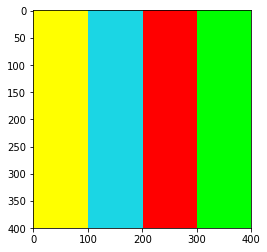

In [3]:
img_add=np.zeros((400,400,3),np.uint8)
for i in range(0,400):
  for j in range(0,400):
    if j <= 100:
      img_add[i,j,0]=255
      img_add[i,j,1]=255
      img_add[i,j,2]=0
    elif j > 100 and j <= 200:
      img_add[i,j,0]=27
      img_add[i,j,1]=214
      img_add[i,j,2]=228
    elif j > 200 and j <= 300:
      img_add[i,j,0]=255
    elif j > 300 and j <= 400:
      img_add[i,j,1]=255

plt.imshow(img_add)
#plt.xticks([]), plt.yticks([])   to hide tick values on X and Y axis
plt.show()